# CHAPTER 04 분류

# 01 분류(Classification)의 개요
지도학습: 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신 러닝 방식. 지도학습의 대표적인 유형은 분류  
분류(Classification): 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.  
> 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

앙상블은 분류에서 가장 각광을 받는 방법 중 하나. (이미지, 영상, 음성, NLP영역에서는 신경망에 기반한 딥러닝이 머신러닝계를 선도) 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용되고 있다.  
앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다.  
- 배깅 방식의 대표) 랜덤 포레스트(Random Forest): 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘.  
하지만 근래의 앙상블은 부스팅 방식으로 지속해서 발전 중
- 부스팅) 그래디언트 부스팅(Gradient Boosting): 부스팅의 효시. 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래걸리는 단점으로 최적화 모델 튜닝이 어렵다.
- XgBoost(eXtra Gradient Boost), LightGBM 
XgBoost(eXtra Gradient Boost), LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡았다.

학습 목표 - 앙상블 방법의 개요, 랜덤포레스트, 그래디언트 부스팅 / XGBoost, LightGBM / 앙상블의 앙상블 - 스태킹(Stacking) 기법

앙상블은 서로 다른/또는 같은 알고리즘을 결합하는데 대부분은 동일한 알고리즘을 결합한다. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리이다.

결정트리
- 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.
- 단점)예측성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생히 반대로 예측 성능이 저하될 수도 있다.
- 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용
- 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문

# 02 결정 트리
결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것으로 룰 기반의 프로그램에 적용되는 if, else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘. -> 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

결정 트리의 구조
- 규칙 노드(Decision Node): 규칙 조건
- 리프 노트(Leaf Node): 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성
- 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.

많은 규칙이 있다 -> 분류를 결정하는 방식이 더욱 복잡해진다 -> 과적합  
- 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.
- 가능한 한 적은 결정 노드로 높은 예측정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다.
- -> 어떻게 트리를 분할(Split)할 것인가가 중요하며 최대한 균일한 데이터 세트를 구성할 수 있도록 분할해야 한다.

균일한 데이터 세트
- 모두 같은 것으로 구성된 것 -> 균일도가 높다
- 모두 검은 색의 공이 들어있는 주머니-> 균일도가 높다
데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
- 모두 검은 색의 공이 들어있는 주머니에서 데이터를 뽑았을 때 데이터에 대한 별다른 정보없이도 '검은 공'이라고 쉽게 예측할 수 있다. 그러나 혼잡도가 높고 균일도가 낮은(검은 공, 흰 공이 반반)조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요하다.

결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 반복하는 방식으로 데이터 값을 예측하게 된다. (가장 첫번째로 만들어져야 하는 규칙 조건: 가장 쉽게 예측할 수 있는 조건)

정보의 균일도를 측정하는 대표적인 방법
- 엔트로피를 이용한 정보 이득 지수(Information Gain)
 - 정보 이득은 엔트로피라는 개념을 기반으로 한다. 
 - 엔트로피: 주어진 데이터 집합의 혼잡도
 - 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
 - 정보 이득 지수 = 1 - 엔트로피 지수
 - **정보 이득이 높은 속성을 기준으로 분할**
- 지니 계수
 - 지니 계수: 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
 - 0이 가장 평등하고 1로 갈수록 불평등하다.
 - 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터의 균일도가 높은 것으로 해석해 **지니 계수가 낮은 속성을 기준으로 분할**한다.

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

## 결정 트리 모델의 특징
결정 트리의 장점
- 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
- 결정 트리가 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있다.
- 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화같은 전처리 작업이 필요 없다.
> 쉽다, 직관적이다.  
 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 작다.

단점
- 과적합으로 정확도가 떨어진다.
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해진다.
> 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 불구하고 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커지고, 결과적으로 복잡한 학습 모델에 이르게 된다. 복잡한 학습 모델은 결국에는 실제 상황에(테스트 데이터 세트) 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없다. 차라리 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 먼저 인정하는 편이 더 나은 성능을 보장할 수 있다. **즉, 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 된다.**

## 결정 트리 파라미터
사이킷런은 결정 트리 알고리즘을 구현한 `DecisionTreeClassifier`와 `DecisionTreeRegressor` 클래스를 제공한다. 
- DecisionTreeClassifier - 분류를 위한 클래스
- DecisionTreeRegressor - 회귀를 위한 클래스

사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees)알고리즘 기반이며 CART는 분류 뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘이다.  
**DecisionTreeClassifier와 DecisionTreeRegressor는 동일한 파라미터를 사용**한다.
- min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
 - (최소 2개 이상의 데이터가 주머니 안에 들어있어야 한다)
- min_samples_leaf
 - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
 - Min_samples_split과 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.
 - ( min_samples_split는 분할 할 수 있는 샘플수를 지정하는 것이고, min_samples_leaf를 분할해서 leaf가 될 수 있는 샘플수를 지정하는 것입니다. 즉 min_samples_split 기준에 맞아서 분할을 하더라도 min_samples_leaf 기준에 맞지 않아서 leaf를 만들수 없으면 최종 leaf 노드로 생성되지 못합니다. 따라서 branch 노드가 아닌 최종단 분할 시 min_samples_split 기준에 맞아도 min_samples_leaf 기준에 맞지 않느면 최종 leaf 노드로 분할 할 수 없습니다.)
- max_features
 - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하며녀 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트.
 - 'sqrt'는 전체 피처 중 루트(전체 피처 개수)만큼 선정
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정
- max_depth
 - 트리의 최대 깊이를 규정
 - 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
 - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes
 -  말단 노드(Leaf)의 최대 개수
 
 
## 결정 트리 모델의 시각화
Graphviz 패키지 : 학습된 결정 트리 규칙을 실제 트리 형태로 시각화.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size = .2,
                                                    random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

export_graphviz(학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', 
                class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names,
                impurity=True,
                filled=True)

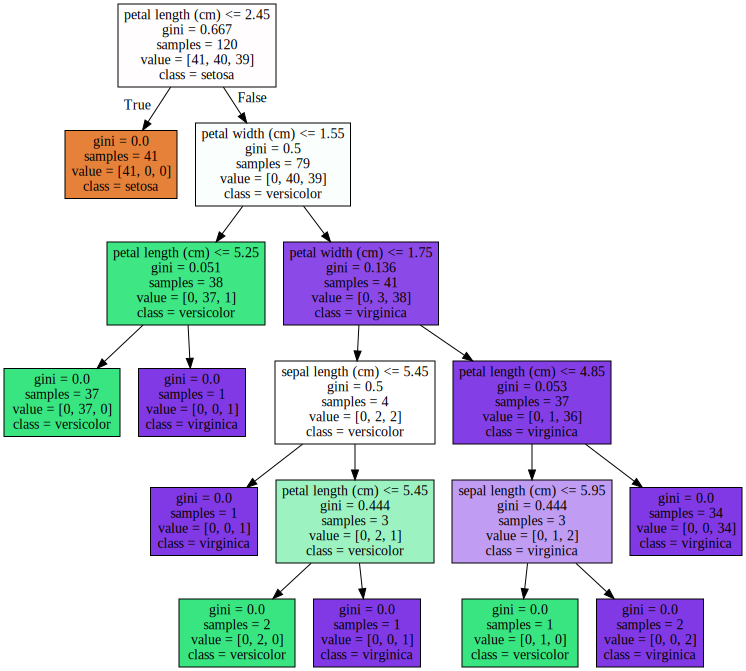

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


리프노드
- 더 이상 자식 노드가 없는 노드 (맨 끝)
- 최종 클래스(레이블) 값이 결정되는 노드
- 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.

브랜치 노드
- 자식 노드가 있는 노드
- 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다.

max_depth = 3으로 다시 해보기

In [6]:
# DecisionTreeClassifier 생성
dt_clf_depth3 = DecisionTreeClassifier(random_state = 156, max_depth=3)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size = .2,
                                                    random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf_depth3.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [7]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf_depth3, out_file='tree.dot', 
                class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names,
                impurity=True,
                filled=True)

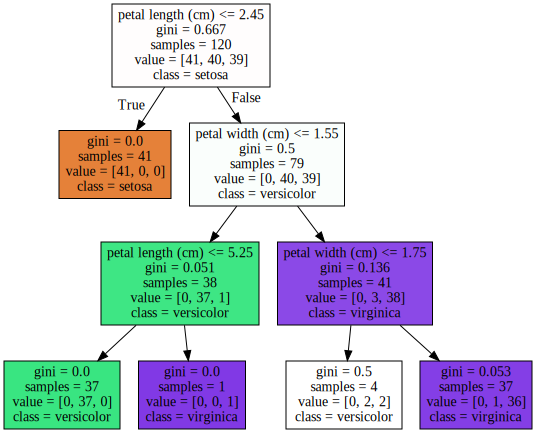

In [8]:
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결정 트리는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importnaces_ 속성으로 제공한다.


feature_importances_
- ndarray 형태로 값을 반환, 피처 순서대로 값이 할당
- 값이 높을수록 해당 피처의 중요도가 높다.

feature importnaces:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


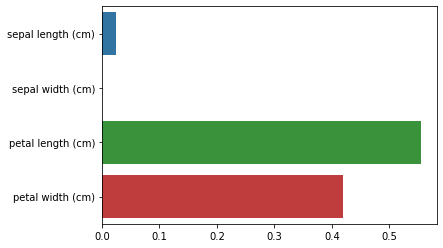

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importnace 추출
print('feature importnaces:\n{}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

여러 피처들 중 petal length가 가장 피처 중요도가 높다

# 결정 트리 과적합(Overfitting)
결정 트리가 학습 데이터를 분할해 예측을 수행하는 방법, 이로 인한 과적합 문제 시각화.  
`make_classification()` 함수: 사이킷런이 제공하는 분류를 위한 테스트용 데이터를 쉽게 만드는 함수.

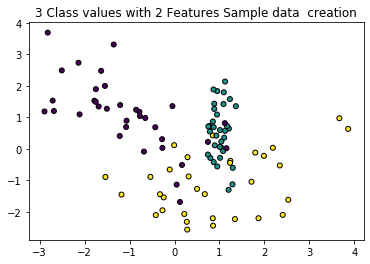

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data  creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes = 3, n_clusters_per_class=1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')


In [15]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

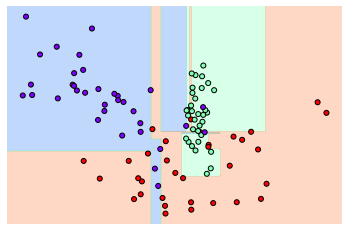

In [16]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다. 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다. 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다.

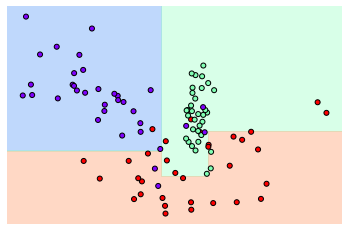

In [18]:
# min_sampes_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류되었다. 다양한 테스트 데이터 세트를 기반으로 한 결정 트리 모델의 예측 성능은 첫 번째 모델보다는 min_samples_leaf=6으로 트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높다.  
테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문..